In [92]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import odr
import matplotlib.pyplot as plt

## Linear Curve Fitting for Change in Pressure vs Fringe Count

\begin{align}
\mu &= 1 + \frac{N \lambda P_a}{2l\Delta{P}} \\[8 pt]
\Delta{P} &= \frac{\lambda P_a}{2l(\mu-1)}N
\end{align}

In [93]:
pressure = [300, 276, 250, 228, 206, 184, 160, 138, 114, 94, 72]
df = pd.DataFrame({'n': np.arange(0,22,2), 'P (mmHg)': pressure})

df['ΔP (mmHg)'] = df.loc[0, 'P (mmHg)'] - df['P (mmHg)']

P_a = 753
λ = 692e-9
l = 80e-3

N, _ = df.shape
df = df.drop(index=0)
df

,n,P (mmHg),ΔP (mmHg)
1,2,276,24
2,4,250,50
3,6,228,72
4,8,206,94
5,10,184,116
6,12,160,140
7,14,138,162
8,16,114,186
9,18,94,206
10,20,72,228


mu =  1.000282
error in mu = 0.000001


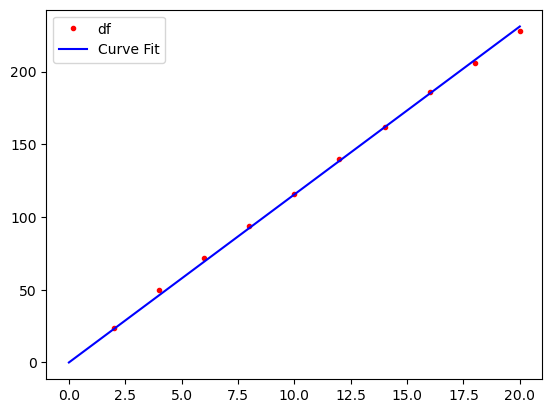

In [94]:
x = df['n'].to_numpy()
y = df['ΔP (mmHg)'].to_numpy()

def model(n, mu):
    return ((λ*P_a)/(2*l*(mu-1)))*n

param, param_cov = curve_fit(model, x, y, [1.1])
print('mu = ', round(param[0], 6))
print(f'error in mu = {np.sqrt(param_cov[0,0]):.6f}')

x_model = np.linspace(0, x[-1], 10)
y_model = model(x_model, param[0])

plt.plot(x, y, '.', color='red', label='df')
plt.plot(x_model, y_model, '-', color='blue', label='Curve Fit')
plt.legend()
plt.show()

In [98]:
table = df[['n', 'ΔP (mmHg)']].rename(columns={'n': 'x', 
                                               'ΔP (mmHg)':'y'})

table['xi^2'] = table['x']**2
table['xiyi'] = table['x']*table['y']

sum_x2 = table['xi^2'].sum()
sum_xy = table['xiyi'].sum()

slope = sum_xy/sum_x2

table['ei'] = table['y'] - slope*table['x']
table['ei^2'] = table['ei']**2

sum_e2 = table['ei^2'].sum()
slope_err = np.sqrt(((1/(N-2))*sum_e2)/sum_x2)

print(f'sum_x2 = {sum_x2}')
print(f'sum_xy = {sum_xy}')
print(f'slope = {slope}, error = {slope_err}')
print(f'sum_e2 = {sum_e2}')

table

sum_x2 = 1540
sum_xy = 17784
slope = 11.548051948051947, error = 0.054682710561517384
sum_e2 = 41.44415584415594


In [96]:
def model2(A, x):
    return A[0]*x

linear = odr.Model(model2)
data = odr.RealData(x, y, sx=0.5/np.sqrt(3), sy = 1/np.sqrt(3))
myodr = odr.ODR(data, linear, beta0=[1.1])
odr_output = myodr.run()
odr_output.pprint()

mu = 1 + (λ*P_a)/(2*l*odr_output.beta[0])
s_mu = (mu-1)*np.sqrt((odr_output.sd_beta[0]/odr_output.beta[0])**2 + (1e-3/(l*np.sqrt(12)))**2)
print(mu)
print(s_mu)

Beta: [11.55031453]
Beta Std Error: [0.05469311]
Beta Covariance: [[0.00743701]]
Residual Variance: 0.4022231297950873
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
1.000281959854022
1.678620567840829e-06
